<a href="https://colab.research.google.com/github/hyeonggyeong/Trend-visualization/blob/main/Code/%EA%B8%B0%EC%97%85_%ED%8A%B8%EB%A0%8C%EB%93%9C_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머리말

안녕하십니까

저희는 이번 '구직자를 위한 기업 트랜드 시각화 경진대회'에 참여하게 된 *한숨잔벌꿀오소리들*  입니다!

첫 대회여서 중간 과정에 있어서 삐걱거림이 조금(?) 있었지만 열심히 준비했습니다 :)


---

# 목차

## 1. 프로젝트 소개
 * **1-1. 프로젝트 컨셉**
 * **1-2. 프로젝트 주제 선정**

## 2. 데이터 준비
* **2-1. 분석과정에 이용된 패키지**
* **2-2. RAW DATA**
* **2-3. DATA PREPROCESSING**
* **2-4. DATA DESCRIPTION**

## 3. 임금 시각화
* **3-1. 규모에 따른 총 급여 분포**
* **3-2. 전체 임금 데이터 시각화 및 결과 확인** 

## 4. 근로시간 시각화
* **4-1. 규모에 따른 근로 시간 분포**
* **4-2. 산업과 규모를 반영한 *wlb-index* 시각화 및 결과확인** 

## 5. 결론
* **5-1. 임금, 근로시간 요약 및 결론**
* **5-2. 임금,근로시간 멀티 시각화**

---

# 1. 프로젝트 소개

* ### **1-1. 프로젝트 컨셉**

  > 대회의 주제 및 취지에 맞게 최대한 많은 구직자들의 공감을 불러일으킬 수 있는 인사이트 및 시각화 자료를 도출하는 것을 최종 목표로 프로젝트를 진행했습니다.이러한 목표를 고려하여 단순히 여러 기업들의 순위를 매겨 시각화를 진행하는 것은
 **(1) 기업별로 종사하는 산업군이 다르다, (2) 특정 기업들의 정보만 제공할 수 밖에 없다** 라고 판단되어 기업 개별 데이터를 이용하기 보단,***산업군을 규모단위로 나눈 데이터를 이용하여 결론을 도출하는 것***으로 방향을 잡았습니다.
 


    

* ### **1-2. 프로젝트 주제 선정**

  > 구직자들이 직장을 선택할 때 어떠한 요소들을 고려하는지 살펴보기 위하여 구인구직 사이트인 '사람인'에서 게시한 자료들을 살펴 보고 다음과 같은 기사들에서 구직자(이직대기자 포함)들의 구직 고려요소로 1위가 연봉, 2위가 워라벨임을 파악했습니다.
  >> [2030 직장선택 기준 1위 “연봉” … 절반 이상 “정년 필요 없어”](https://www.saramin.co.kr/zf_user/help/live/view?idx=108455&list_idx=10&listType=news&category=10&keyword=%EC%9B%8C%EB%9D%BC%EB%B2%A8&menu=1&page=1)\
   [직장인 80%, 1회 이상 이직 경험 … 연봉, 근무 환경 영향](https://www.saramin.co.kr/zf_user/help/live/view?idx=108581&list_idx=0&listType=news&category=10&keyword=%EC%9B%8C%EB%9D%BC%EB%B2%A8&menu=1&page=1)
  
 이에 따라 프로젝트 주제를 ***'산업과 규모에 따른 연봉 및 근무시간 시각화'*** 로 설정했습니다. 
 
    

---

# 2. 데이터 준비

* ### 2-1. **분석과정에 이용된 패키지**

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import matplotlib

# 한글은 맑은 고딕을 이용
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

# 경고메세지 무시
warnings.filterwarnings(action='ignore')

# 
* ### **2-2. RAW DATA**
> * [국가통계포털](https://kosis.kr/index/index.do)에서 제공하는 오픈 데이터 이용
> * ***국내통계>주제별통계>사업체노동력조사>근로실태부분>산업/규모별 임금 및 근로시간*** 에 해당하는 데이터 사용
> * 데이터는 반기(6개월)기준으로 2020년 상반기부터 2021년 상반기 까지, 총 1년 6개월간의 데이터를 이용
> * 데이터는 5개 규모의 70개 산업들, 즉, 350개의 관점에서 3개의 근로 시간 관련 특성과 3개의 임금관련 특성을 보유
> * 일용직, 계약직 근로자를 제외한 상용 근로자의 데이터
> * 결측치의 경우 ...으로 표현되어있다.
>> 시간 관련 특성 : 상용총근로시간, 상용소정실근로시간, 상용대하여초과근로시간 (단위 : 시간/월)\
임금 관련 특성 : 상용정액급여, 상용초과급여, 상용특별급여  (단위 : 원/월)

In [ ]:
df = pd.read_csv('https://github.com/hyeonggyeong/Trend-visualization/raw/main/Datasets/2_2_%EC%9E%84%EA%B8%88%EA%B3%BC%EA%B7%BC%EB%A1%9C(3%EB%B6%84%EA%B8%B0).csv',
                 encoding = 'CP949')
df.head()

,산업분류,규모별,2020 1/2,2020 1/2.1,2020 1/2.2,2020 1/2.3,2020 1/2.4,2020 1/2.5,2020 2/2,2020 2/2.1,2020 2/2.2,2020 2/2.3,2020 2/2.4,2020 2/2.5,2021 1/2,2021 1/2.1,2021 1/2.2,2021 1/2.3,2021 1/2.4,2021 1/2.5
0,산업분류,규모별,상용총근로시간 (시간),상용소정실근로시간 (시간),상용초과근로시간 (시간),상용정액급여 (원),상용초과급여 (원),상용특별급여 (원),상용총근로시간 (시간),상용소정실근로시간 (시간),상용초과근로시간 (시간),상용정액급여 (원),상용초과급여 (원),상용특별급여 (원),상용총근로시간 (시간),상용소정실근로시간 (시간),상용초과근로시간 (시간),상용정액급여 (원),상용초과급여 (원),상용특별급여 (원)
1,"석탄, 원유 및 천연가스 광업",5~9인,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,"석탄, 원유 및 천연가스 광업",10~29인,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,"석탄, 원유 및 천연가스 광업",30~99인,175.1,160.5,14.6,4649736,504809,736253,176.9,161.8,15.1,4505963,563020,947040,175.1,159.6,15.4,4754311,578219,675995
4,"석탄, 원유 및 천연가스 광업",100~299인,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


# 
* ### **2-3. DATA PREPROCESSING**
> * RAW DATA를 분석에 이용하기 위한 DATA 형태로 전처리하는 과정.
> * 급여의 경우 구직자의 경우 근로 소득(실근로, 초과근로)외에도 떡값, 성과금 등등의 복지적인 혜택을 어느정도 포함시키기 위하여 3종류의 급여를 합했다.

In [ ]:
# 존재하지 않는 데이터가 ... 으로 되어있어서 nan으로 바꿈 
df[df == '...' ] = np.nan

# 현재 데이터 프레임의 colums이 (년도 분기.데이터항목숫자)로 되어 있고 첫 행이 데이터항목숫자에 해당하는 항목의 내용이다.
df.drop([0],axis = 0, inplace=True)

# 데이터 프레임의 숫자들이 다 str이기 때문에 float로 바꾼 후, 3 분기에 해당하는 내용들을 평균으로 만든다.
list_1 = []
list_2 = []
list_3 = []
list_4 = []
list_5 = []
list_6 = []

for i in range(350):
    list_1.append(np.mean([float(df.iloc[i,[2,8,14]][0]),float(df.iloc[i,[2,8,14]][1]),float(df.iloc[i,[2,8,14]][2])]))    
    list_2.append(np.mean([float(df.iloc[i,[3,9,15]][0]),float(df.iloc[i,[3,9,15]][1]),float(df.iloc[i,[3,9,15]][2])]))
    list_3.append(np.mean([float(df.iloc[i,[4,10,16]][0]),float(df.iloc[i,[4,10,16]][1]),float(df.iloc[i,[4,10,16]][2])]))
    list_4.append(np.mean([float(df.iloc[i,[5,11,17]][0]),float(df.iloc[i,[5,11,17]][1]),float(df.iloc[i,[5,11,17]][2])]))
    list_5.append(np.mean([float(df.iloc[i,[6,12,18]][0]),float(df.iloc[i,[6,12,18]][1]),float(df.iloc[i,[6,12,18]][2])]))
    list_6.append(np.mean([float(df.iloc[i,[7,13,19]][0]),float(df.iloc[i,[7,13,19]][1]),float(df.iloc[i,[7,13,19]][2])]))
    
# 데이터 프레임에 평균으로 통합된 값을 추가하고, 분기별로 나누어져 있던 값들을 싹다 없앤다.
# 추가적으로 총급여와 근로급여를 추가한다.
df['상용총근로시간']=list_1
df['상용소정실근로시간']=list_2
df['상용초과근로시간']=list_3
df['상용정액급여']=list_4
df['상용초과급여']=list_5
df['상용특별급여']=list_6
df.drop(df.columns[2:-6],axis=1, inplace = True)
df['한달총급여'] = df['상용정액급여']+df['상용초과급여']+df['상용특별급여']
df.sample(2)
   

,산업분류,규모별,상용총근로시간,상용소정실근로시간,상용초과근로시간,상용정액급여,상용초과급여,상용특별급여,한달총급여
340,협회 및 단체,300인이상,152.266667,149.933333,2.333333,4.352166e+06,54419.333333,5.721613e+05,4.978747e+06
284,전문 서비스업,100~299인,167.000000,159.200000,7.800000,5.799624e+06,200342.000000,1.145815e+06,7.145781e+06


# 
* ### 2-4. **DATA DESCRIPTION**

In [ ]:
# 데이터 description 
df.describe()

,상용총근로시간,상용소정실근로시간,상용초과근로시간,상용정액급여,상용초과급여,상용특별급여,한달총급여
count,313.000000,313.000000,310.000000,3.130000e+02,3.100000e+02,3.110000e+02,3.080000e+02
mean,168.084452,157.209372,10.980323,3.415065e+06,2.684877e+05,5.749828e+05,4.260241e+06
std,12.918678,9.773900,8.576359,8.313654e+05,2.125245e+05,6.196647e+05,1.365327e+06
min,84.133333,81.233333,0.200000,1.261456e+06,5.428333e+03,1.491400e+04,1.569611e+06
25%,162.433333,154.733333,4.541667,2.843369e+06,1.100015e+05,1.566857e+05,3.277110e+06
50%,167.800000,158.666667,8.566667,3.291906e+06,2.041810e+05,3.245663e+05,3.961164e+06
75%,174.733333,161.533333,16.000000,3.917102e+06,3.849754e+05,7.698727e+05,4.974976e+06
max,212.866667,184.233333,49.200000,6.254246e+06,1.025567e+06,3.609147e+06,9.126376e+06


In [ ]:
# 데이터 description에서 표준편차를 평균으로 나눔

print('상용총근로시간 :',df.describe().iloc[2,0]/df.describe().iloc[1,0])
print('한달총급여 :',df.describe().iloc[2,-1]/df.describe().iloc[1,-1])


상용총근로시간 : 0.07685825924268061
한달총급여 : 0.3204811847105029


서로 다른 단위의 표준편차들을 비교하기 위해 표준편차를 평균으로 나눈 값을 살펴보면 '상용총근로시간'의 수치가 '한달총급여'의 수치에 비해 더 작음을 알 수 있다. 이는 근로시간보다 급여의 편차가 더 심하다고 해석할 수 있다. 

---

# 3. 임금 시각화


* ### **3-1. 규모에 따른 급여 분포**
> 산업의 규모가 급여에 어떤 영향을 끼치는지 직관적으로 확인하기 위하여 boxplot을 형성 한 후 분석

#### → 총급여 박스플롯

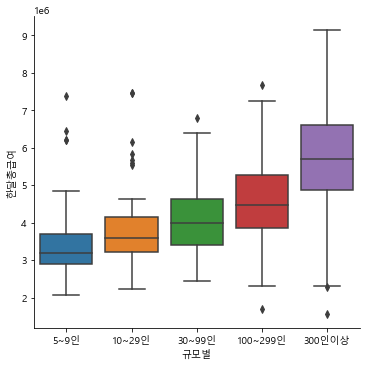

In [ ]:
sns.catplot(data = df, x='규모별',y='한달총급여', kind='box')

>- **규모가 커짐에 따라  급여(근로소득급여,특별급여 포함)의 중앙값이 상승하는 경향이 있다** 이는 규모가 커질수록 총급여에 어느정도 양의 영향을 끼친다고 유추해볼 수 있다.
>- **하위 25% 값이 규모가 커짐에 따라 차이가 증가하고, 최소값이 비슷한 경향이 있다**
>- 여러 급여 종류 중(상용정액급여, 초과근무급여, 특별급여) 어떤 급여가 규모에 따른 급여 차이를 많이 일으키는지 알아내기 위하여 추가적인 박스플롯 분석 실시


#### → 일반근로 급여 박스플롯

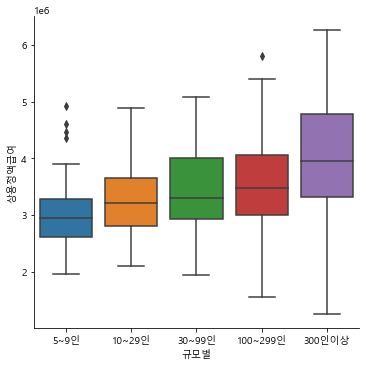

In [ ]:
sns.catplot(data = df, x='규모별',y='상용정액급여', kind='box')

>- **총급여의 박스플롯과 비슷한 박스 플랏을 형성했다.** 이는 총 급여의 대부분이 일반근로로 인한 정액급여이기 때문이다.
>- **총급여와 마찬가지로 규모가 증가할수록 중앙값이 커지는 경향이 있고 총급여에 비하여 규모에 따른 중앙값의 차이가 더 작다.** 이는 총 급여에서의 규모별 차이는 일반근로로 인한 급여로 인한 것 보다 다른 급여들(초과급여,특별급여)로 인한 것이 더 큰 것을 알 수있다.
>- **총급여와 비교하면 하위 25%값의 차이가 총급여 보다 작고 최소값이 규모가 클수록 감소하는 경향이 있다.** 총급여의 하위 25%의 차이가 더 크다는 것을 감안하면, 총급여의 차이는 일반근로 급여보단 다른 종류의 급여들로 인하여 생기는 것으로 알 수 있다.  


#### → 초과급여 박스플롯

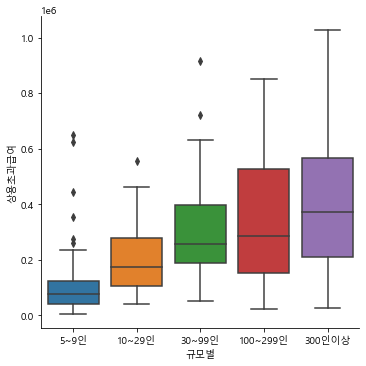

In [ ]:
sns.catplot(data = df, x='규모별',y='상용초과급여', kind='box')

>- **5 ~ 9인 규모의 초과급여가 확연하게 낮다.** 이는 총 급여에서 5~9인의 규모가 낮은 임금을 가져가는 이유 중 하나이다.
>- **총 급여와 비교하면 100~299인과 300인 이상의 규모에서 편차가 크다.**



#### → 특별급여 박스플롯

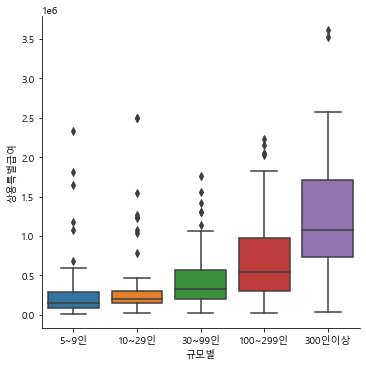

In [ ]:
sns.catplot(data = df, x='규모별',y='상용특별급여', kind='box')

>- **최소값을 제외한 대부분의 수치들이 규모가 증가할수록 차이가 확연하게 증가한다.** 다른 임금들의 박스플롯과 비교해 보았을 때, 총 급여에서 규모에 따른 차이가 증가하는 **주요 원인**임을 알 수 있다.

>* **박스플롯 분포 분석 결과**
>> * 박스플롯 분포 분석을 요약하면, **모든 종류의 급여(총,정액,초과,특별)에서 규모가 증가함에 따라 급여가 증가하는 경향**이 보여지고, 규모에 따른 총급여는 특별급여,초과급여,정액급여 순으로 차이가 크다. 즉, 규모가 증가함에 따라 **총 급여의 차이가 커지는 주요 원인은 특별급여, 초과급여, 정액급여 순**이다.
>> * 즉 규모가 클수록 임금이 많은 이유는 기본 근로(정액,초과)로 인한 차이도 있지만, **특별 급여로 인한 차이가 확연하다.**
>> * 특별 급여에는 **'상여금, 성과급, 임금인상 소급분, 학자금(대출금 제외) 등등'**이 포함되어 있다.  

# 
* ### **3-2. 전체 임금 데이터 시각화 및 결과 확인**
> 규모와 산업을 포함하여 총 350개의 관점(결측치 포함)에 있는 모든 데이터들을 한눈에 비교할 수 있게 barplot과 heatmap을 통해 시각화를 실시한 후, 앞서 도출한 결과와 비교

#### → barplot을 이용한 규모에 따른 임금변화 확인하기

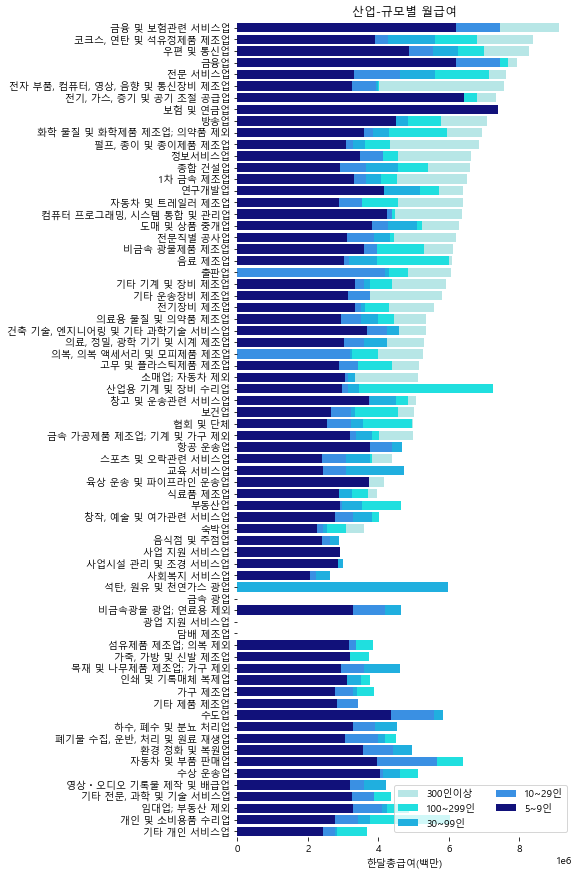

In [ ]:
# 시각화를 위하여 멀티 인덱스 생성
df_1 = df.set_index(['산업분류', '규모별'])

# 기존 데이터를 5개의 산업 규모로 나눔
# 이 데이터는 차후 시간과 관련된 시각화 과정에도 이용할 것임 
scale_1 = df_1.xs('5~9인',level = '규모별').reset_index()
scale_2 = df_1.xs('10~29인',level = '규모별').reset_index()
scale_3 = df_1.xs('30~99인',level = '규모별').reset_index()
scale_4 = df_1.xs('100~299인',level = '규모별').reset_index()
scale_5 = df_1.xs('300인이상',level = '규모별').reset_index()

# 한달총급여와 관련된 시각화를 위하여 별도의 데이터 프레임을 생성 후 규모별 값들을 삽입
month_pay =pd.DataFrame({'산업분류':scale_1.산업분류,
                         '5~9인':scale_1.한달총급여,
                         '10~29인':scale_2.한달총급여,
                         '30~99인':scale_3.한달총급여,
                         '100~299인':scale_4.한달총급여,
                         '300인이상':scale_5.한달총급여
                        })

# 시각화 과정
# 초기화
f, ax = plt.subplots(figsize=(6, 15))

# 정렬(규모가 클수록 한달총급여가 많을것이라 했기 떄문에 300인 이상 규모를 기준으로 내림차순)
month_data = month_pay.sort_values("300인이상", ascending=False)

# 300인이상
sns.barplot(x="300인이상", y="산업분류", data=month_data,
            label="300인이상", color="paleturquoise")

# 100~299인 사이
sns.barplot(x="100~299인", y="산업분류", data=month_data,
            label="100~299인", color="aqua")


# 30~99인사이
sns.barplot(x="30~99인", y="산업분류", data=month_data,
            label="30~99인", color="deepskyblue")

# 10~29인 사이
sns.barplot(x="10~29인", y="산업분류", data=month_data,
            label="10~29인", color="dodgerblue")

# 5~9인 사이
sns.barplot(x="5~9인", y="산업분류", data=month_data,
            label="5~9인", color="darkblue")

# 그래프에 추가적인 정보들 기입
ax.set_title('산업-규모별 월급여')
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,9500000), ylabel="",
       xlabel="한달총급여(백만)")
sns.despine(left=True, bottom=True)

>- 위 시각화 자료는 여러 산업군들의 규모에 따른 급여를 barplot 형태로 나타낸 것이다. 위 자료의 장점으로는 **규모에 따른 급여 차이를 직관적으로 확인 가능하다**
>- 위 시각화 자료를 보면, 대부분의 산업군들에서 규모가 커짐에 따라 급여가 상승하는 것으로 나타난다. 이는 앞서 도출한 **규모가 증가할 수록 급여가 증가한다는 결과**를 보여준다. 
>- 추가적으로 위 시각화 자료를 통해 얻을 수 있었던 또 다른 정보로는 **'급여를 고려하여 직장을 선택할 때, 해당 직장의 산업군과 직장의 규모 두가지 관점을 독립적으로 바라보는 것이 아닌, 하나의 pair로 바라보아야 한다는 것이다.'** 이를 이해하기 쉽게 설명하면, 300인 규모의 특정 산업이 다른 어떤 산업보다 급여를 많이 받는다는 사실이 다른 규모에도 똑같이 적용되지 않는다는 점이다. 말 그대로 *(산업,규모)*의 쌍에 따라 받는 급여가 천차 만별이다. 따라서 구직자 입장에서 임금을 많이 받는 직장에 들어가고 싶으면 단순하게 규모 혹은 산업을 생각하는 것이 아니라 산업과 규모를 동시에 쌍으로 생각해야 할 필요성이 있다.



#### → heatmap을 이용한(산업,규모) 쌍에 대한 임금 확인하기

Text(0.5, 1.0, '산업-규모별 월급여')

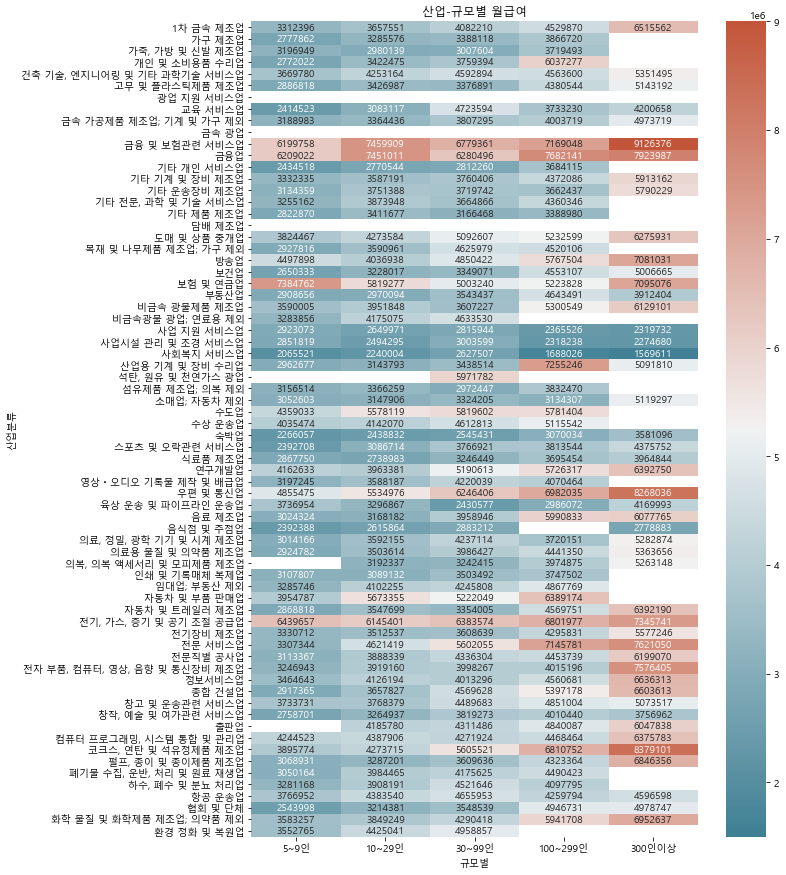

In [ ]:
data = df.pivot("산업분류", "규모별", "한달총급여")
data = data[['5~9인','10~29인','30~99인','100~299인','300인이상']]

f, ax = plt.subplots(figsize=(10, 15))
sns.heatmap(data, vmin = 1500000, vmax = 9000000, cbar = True, annot=True, fmt=".0f" 
            ,ax=ax, cmap =sns.diverging_palette(220, 20, as_cmap=True))
plt.title("산업-규모별 월급여")

>- 위 시각화 자료는 *(산업군,규모)* 쌍을 고려하여 산업별 규모에 따른 월급여를 히트맵으로 표현한 것이다.
>- barplot과 비교하면 규모에 따른 증가를 확연하게 알순 없지만 대략적으로 알 수 있고, 추가적으로 자세한 수치도 알 수 있다. 

---

# 4. 근로시간 시각화


* ### **4-1. 규모에 따른 근로시간 분포**
> 산업의 규모가 급여에 어떤 영향을 끼치는지 직관적으로 확인하기 위하여 **boxplot을 형성 한 후 분석**

#### → 총근로시간 박스플롯

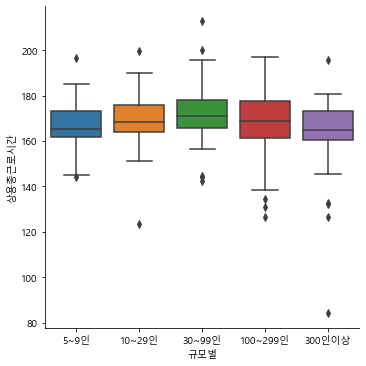

In [ ]:
sns.catplot(data = df, x='규모별',y='상용총근로시간', kind='box')

> - **중앙값, 박스 위치(상위25%, 하위 25%)**에 대한 차이가 미미하다
> - 평균의 차이가 얼마 없어 보이지만 **총 근로시간이 10시간 차이나도 하루 약 30분을 더 일하는 것**이기 때문에, **미묘한 차이를 분석하고 인사이트를 도출 하는 것이 중요**하다 판단

#### → 소정실근로시간 박스플롯

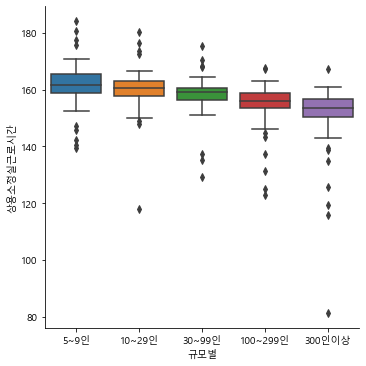

In [ ]:
sns.catplot(data = df, x='규모별',y='상용소정실근로시간', kind='box')

> - 소정실 근로시간의 경우 규모가 커짐에 따라 감소하는 경향이 있음을 알 수 있다. **이는 규모가 커질수록 정해진 근무시간이 작아진다는 것을 의미한다**
> - 정해진 근무시간, 즉,계약된 근로시간이 작다는 것은 개인적인 시간에 할당할 수 있는 시간이 증가한다는 것이다. 즉, 정해진 근무시간이 적은 것은 **개인적인 워라벨을 충족시킬 수 있는 유연성이 높다는 것**


#### → 추가근로시간 박스플롯

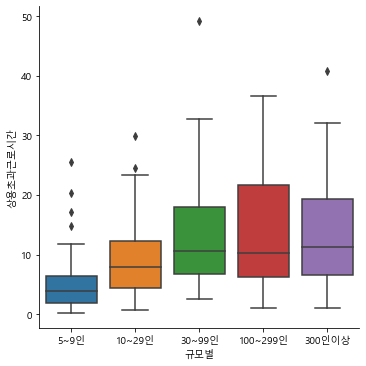

In [ ]:
sns.catplot(data = df, x='규모별',y='상용초과근로시간', kind='box')

> - 추가근로시간의 경우 소정실근로시간과는 반대로 규모가 커짐에 따라 증가하는 경향이 있다. **이는 총 근로시간이 추가근무시간과 소정실근로시간을 합한 값임을 생각하면 유추가능한 수치**
> - 추가근로가 소정실근로보다 임금이 많기 때문에 추가근로시간이 많을수록 **워라벨과 소득 사이의 균형을 조절하기 쉽다.**

>* **박스플롯 분포 분석 결과**
>> * 전 규모에서 **총근무시간은 비슷**하다.
>> * 하지만 총 근무시간에서 **소정실근로시간이 차지하는 비율**은 **규모가 클수록 작아진다.(추가근무는 증가)**
>> * 추가 근로가 많을 수록 경제적 소득을 조절하기 쉽고, 소정실근로시간이 작을수록 워라벨 유연성이 커진다.
>> * 결과적으로 **규모가 커질 경우** 소정실근로시간이 작아지고, 추가근로시간이 많아지기 때문에 **워라벨을 조절하기가 쉬우며, 소득과 워라벨의 균형을이루기가 쉬워진다.**

#   
* ### **4-2. 산업과 규모를 반영한 *wlb-index* 시각화 및 결과 확인**
> - 규모와 산업을 포함하여 총 350개의 관점(결측치 포함)에 있는 모든 데이터들을 한눈에 비교할 수 있게 시각화를 개시하고, 앞서 도출한 결과와 비교
> - boxplot의 결과대로 **소정실근로시간이 차지하는 비율이 작아질 수록 워라벨 유연성이 커지고, 소득과 워라벨의 균형이 이루어지기 쉽기 때문에** 이러한 **워라벨을 수치화 하기위하여 독자적인 index생성**
>> - 소정실근로시간이 작고, 추가근무시간이많을수록 좋기 때문에  추가근무시간을 소정실근로시간으로나눈 백분율로 wlb-index생성
>>\begin{align}
wlb-index = \frac{추가근무시간}{소정실근로시간}*100
\end{align}
>> - *wlb-index*가 클수록 워라벨이 좋다.

#### → barplot을 활용하여 규모에 따른 *work-life-balance-index(wlb)* 변화 확인하기

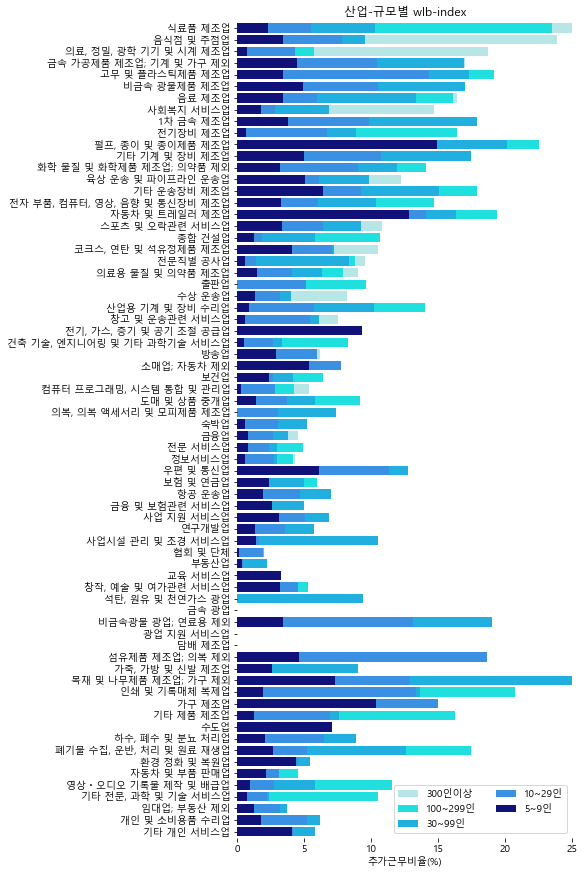

In [ ]:

# wlr-index와 관련된 시각화를 위하여 별도의 데이터 프레임을 생성 후 규모별 값들을 삽입
month_work =pd.DataFrame({'산업분류':scale_1.산업분류,
                         '5~9인':scale_1.상용초과근로시간/scale_1.상용소정실근로시간*100,
                         '10~29인':scale_2.상용초과근로시간/scale_2.상용소정실근로시간*100,
                         '30~99인':scale_3.상용초과근로시간/scale_3.상용소정실근로시간*100,
                         '100~299인':scale_4.상용초과근로시간/scale_4.상용소정실근로시간*100,
                         '300인이상':scale_5.상용초과근로시간/scale_5.상용소정실근로시간*100
                        })

# 초기화
f, ax = plt.subplots(figsize=(6, 15))

# 정렬(규모가 작을수록 총근무시간이 많을것이라 했기 떄문에 5~9인 규모를 기준으로 내림차순)
work_data = month_work.sort_values("300인이상", ascending=False)

# 300인이상
sns.barplot(x="300인이상", y="산업분류", data=work_data,
            label="300인이상", color="paleturquoise")

# 100~299인 사이
sns.barplot(x="100~299인", y="산업분류", data=work_data,
            label="100~299인", color="aqua")


# 30~99인사이
sns.barplot(x="30~99인", y="산업분류", data=work_data,
            label="30~99인", color="deepskyblue")

# 10~29인 사이
sns.barplot(x="10~29인", y="산업분류", data=work_data,
            label="10~29인", color="dodgerblue")

# 5~9인 사이
sns.barplot(x="5~9인", y="산업분류", data=work_data,
            label="5~9인", color="darkblue")

# 추가적인 정보 기입
ax.set_title('산업-규모별 wlb-index')
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,25), ylabel="",
       xlabel="추가근무비율(%)")
sns.despine(left=True, bottom=True)

> - 위 시각화 자료는 규모가 커질수록 wlb-index가 증가하는지를 확인하기 위한 barplot이다. 
> - 규모가 커질수록 wlb-index가 증가하면 한 bar당 많은 색이 존재한다.
> - 위 시각화 자료를 통해 규모가 커질수록 wlb-index가 증가함을 알 수 있다.
> - wlb-index 또한 규모와 산업에 따라 **수치가 천차만별**이기 때문에, **(산업군,규모) 쌍으로 살펴봐야** 한다.



#### → heatmap을 활용하여 *(산업, 규모)* 에 따른 *work-life-balance-index(wlb)* 수치 확인하기

Text(0.5, 1.0, '산업-규모별 wlb-index')

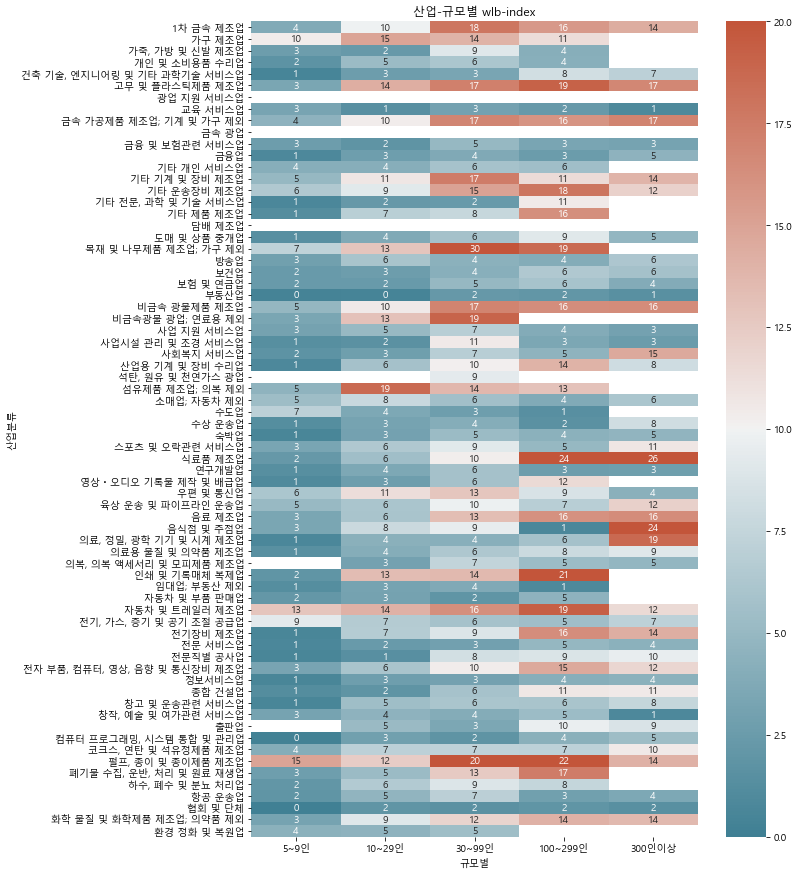

In [ ]:
df_3 = df
df_3['wlb-index'] = df_3['상용초과근로시간']/df_3['상용소정실근로시간']*100
data = df.pivot("산업분류", "규모별", "wlb-index")
data = data[['5~9인','10~29인','30~99인','100~299인','300인이상']]

f, ax = plt.subplots(figsize=(10, 15))
sns.heatmap(data, vmin = 0, vmax = 20, cbar = True, annot=True, fmt=".0f" 
            ,ax=ax, cmap =sns.diverging_palette(220, 20, as_cmap=True))
plt.title("산업-규모별 wlb-index")

>- 위 시각화 자료는 워라벨을 수치화한 값인 wlb-index를 heatmap으로 시각화 한 자료이다.
> - 대략적으로 규모가 증가함에 따라 빨간색으로 변하는 것을 볼 수 있고 이는 **규모가 증가함에 따라 워라벨이 좋다는 결론을 도출할 수 있다.**
>- barplot과 비교하면 규모에 따른 증가를 확연하게 알순 없지만 대략적으로 알 수 있고, 추가적으로 자세한 수치도 알 수 있다. 

---

# 5. 결론

* ### **5-1. 임금, 근로시간 요약 및 결론**
> * 임금 부분 
>> * **규모가 증가함**에 따라 **총급여, 정액급여, 초과근무급여, 특별급여가 상승**한다.
>> * **규모에 따른 급여액의 차이**는 **특별급여가 가장 많은 차이를 냈고,정액급여가 가장 작은 차이**를 냈다.
>> * 구직을 할때 임금만을 고려한다면, **산업군과 규모를 독립적으로 보는 것이 아닌 (산업군, 규모) 쌍**으로 알아봐야 한다.
> * 근로시간부분
>> * **규모가 증가함**에 따라 **총근로시간**은 **차이가 미미**,**소정실근로시간**은 **감소**, **추가근로시간**은 **증가**한다.
>> * **소정실근로시간이 작으**면 워라벨 시간을 유연하게 조절 가능하고, **추가근로시간이 많으**면 소**득과 워라벨의 균형을 맞추기 쉬워진다.** 
>> * 따라서 독자적인 *index* 인 *work-life-balance-index(wlb-index)* 을 만들고 이 수치를 통해 워라벨을 수치화했다.
>> * *wlb-index*는 **소정실근로시간에 대한 추가근로시간의 비율**로 구할 수 있다.
>> * *wlb-index*가 커질수록 워라벨이 좋다.
>> * 결론적으로 규모가 커질수록 **워라벨이 좋아지는 경향이 지배적이다.**

* ### **5-2. 임금, 근로시간 멀티 시각화**
> 마지막으로 임금과 wlb-index를 한눈에 알 수 있게 시각화를 시행했다. 

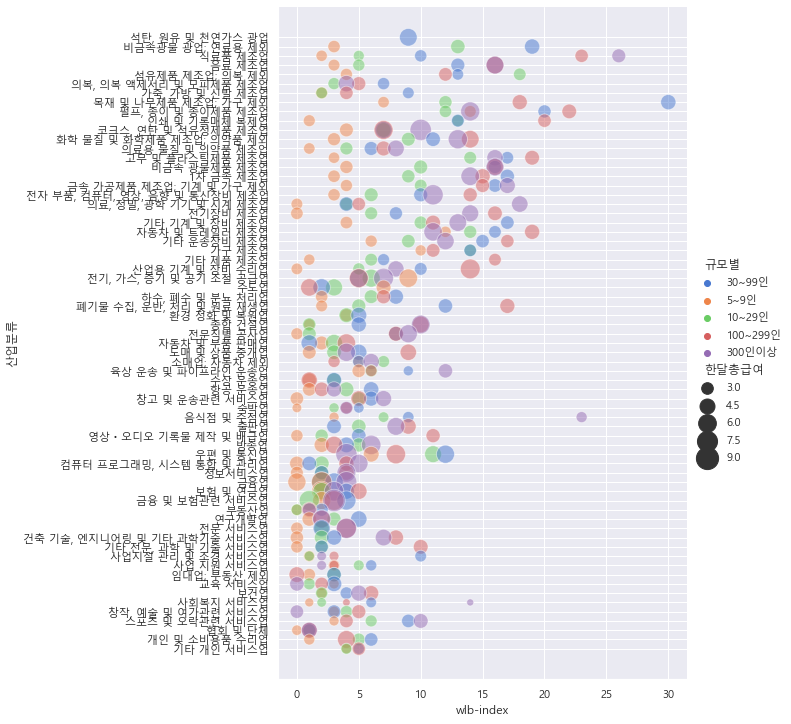

In [ ]:
df4 =df
df4=df.dropna()
df_str = df4[['산업분류','규모별']]
df_int = df4[df4.columns.difference(['산업분류','규모별'])].astype(int)
df_3= pd.concat([df_str, df_int], axis = 1)

sns.set_theme(style="white")

sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

sns.relplot(x="wlb-index", y="산업분류", hue="규모별", size = "한달총급여",
            sizes=(50, 500), alpha=.5, palette="muted",
            height=10, data=df_3)

> * 산업군에 따라 규모에 따른 wlb-index의 차이는 다양하지만 대체적으로 규모가 증가함에 따라 wlb-index가 증가하는 경향이 있다.
> * wlb-index의 관점에서 봤을 때, 규모가 클수록 소정실근로시간은 감소하고 추가근로시간이 증가한다. 총 근로시간이 비슷할 때, 추가근로시간이 차지하는 비율이 많아지면 더 많은 급여를 얻을 수 있다. **이는 곧 규모가 커짐에 따라 *wlb-index* 가 증가하고 *wlb-index*의 증가는 급여의 증가로 이어진다는 것을 내포한다.**